In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
! kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! mv kaggle.json /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download dibakarsil/9-classes-noisy-image-dataset

100% 5.35G/5.35G [04:19<00:00, 20.2MB/s]
100% 5.35G/5.35G [04:19<00:00, 22.2MB/s]


In [ ]:
! unzip --qq /content/9-classes-noisy-image-dataset.zip

In [ ]:
! mv dataset/dataset/train_im train_im

In [ ]:
! mv dataset/dataset/test_im test_im

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
idg = ImageDataGenerator()

In [ ]:
sample_img = cv2.imread("/content/train_im/saltpepper/100075sltpepprimgNoise0.95.jpg")

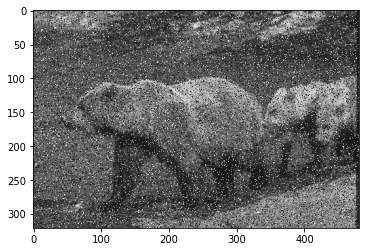

In [ ]:
plt.imshow(sample_img)

In [ ]:
sample_img.shape

(321, 481, 3)

In [ ]:
gen = idg.flow_from_directory("train_im",batch_size=100,target_size=(200,200))

Found 12000 images belonging to 9 classes.


In [ ]:
#types of noise
gen.class_indices

{'erlang': 0,
 'exponential': 1,
 'gaussian': 2,
 'lognormal': 3,
 'poisson': 4,
 'rayleigh': 5,
 'saltpepper': 6,
 'speckle': 7,
 'uniform': 8}

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
resmodel = ResNet50(include_top=False, input_shape=(200, 200, 3))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
resmodel.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [ ]:
resmodel.trainable = False

In [ ]:
flat = Flatten()(resmodel.output)
d1 = Dense(2000, activation="relu")(flat)
d2 = Dense(800, activation="relu")(d1)
d3 = Dense(500, activation="relu")(d2)
d31 = Dense(200, activation="relu")(d3)
drop1 = Dropout(.2)(d31)
d4 = Dense(200, activation="relu")(drop1)
d5 = Dense(100, activation="relu")(d4)
drop2 = Dropout(.2)(d5)
out_layer = Dense(9, activation="softmax")(drop2)

In [ ]:
model = Model(resmodel.input, out_layer)

In [ ]:
#model.summary()

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit_generator(gen, steps_per_epoch=18, epochs=25)

<ipython-input-24-9076e6c80b96>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(gen, steps_per_epoch=18, epochs=25)


Epoch 1/25
18/18 [==============================] - 22s 518ms/step - loss: 8.3595 - accuracy: 0.1750
Epoch 2/25
18/18 [==============================] - 9s 454ms/step - loss: 1.9063 - accuracy: 0.3261
Epoch 3/25
18/18 [==============================] - 8s 417ms/step - loss: 1.6374 - accuracy: 0.3989
Epoch 4/25
18/18 [==============================] - 7s 391ms/step - loss: 1.4034 - accuracy: 0.4678
Epoch 5/25
18/18 [==============================] - 9s 470ms/step - loss: 1.2712 - accuracy: 0.5011
Epoch 6/25
18/18 [==============================] - 7s 385ms/step - loss: 1.2320 - accuracy: 0.5156
Epoch 7/25
18/18 [==============================] - 7s 358ms/step - loss: 1.1374 - accuracy: 0.5561
Epoch 8/25
18/18 [==============================] - 7s 352ms/step - loss: 1.1083 - accuracy: 0.5567
Epoch 9/25
18/18 [==============================] - 9s 471ms/step - loss: 1.0286 - accuracy: 0.5733
Epoch 10/25
18/18 [==============================] - 7s 351ms/step - loss: 1.0001 - accuracy: 0.583

In [ ]:
model.save('noise_classify_model.h5',)

In [ ]:
#predict on salt and pepper noise

In [ ]:
noisy_img = cv2.imread("/content/test_im/saltpepper/DatabaseImage0002sltpepprimgNoise0.95.jpg")

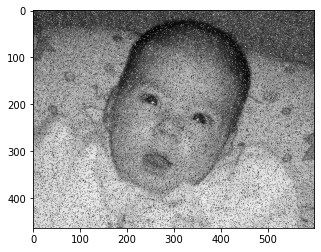

In [ ]:
plt.imshow(noisy_img)

In [ ]:
resizedImg = cv2.resize(noisy_img,(200,200))

In [ ]:
resizedImg.shape

(200, 200, 3)

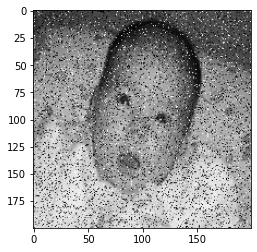

In [ ]:
plt.imshow(resizedImg)

In [ ]:
result = model.predict(np.array([resizedImg]))

1/1 [==============================] - 1s 1s/step


In [ ]:
result

array([[8.0224991e-20, 7.1408352e-19, 4.7115242e-21, 9.6125218e-20,
        1.2270192e-19, 5.4153993e-16, 1.0000000e+00, 1.1651076e-14,
        5.4243456e-18]], dtype=float32)

In [ ]:
result.argmax(axis=1)[0]

6

In [ ]:
gen.class_indices

{'erlang': 0,
 'exponential': 1,
 'gaussian': 2,
 'lognormal': 3,
 'poisson': 4,
 'rayleigh': 5,
 'saltpepper': 6,
 'speckle': 7,
 'uniform': 8}

In [ ]:
def getClass(index):
  keyDict = gen.class_indices
  reversedDict = dict()
  for key in keyDict:
      val = keyDict[key]
      reversedDict[val] = key
  return reversedDict[index]

In [ ]:
getClass(result.argmax(axis=1)[0])

'saltpepper'

1/1 [==============================] - 0s 47ms/step
[[2.0563191e-02 6.2250998e-04 7.5251161e-04 5.5175036e-01 2.9562522e-02
  3.9552587e-01 2.4326700e-06 3.3088272e-05 1.1874926e-03]]


'lognormal'

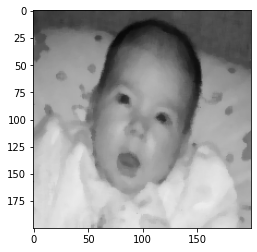

In [ ]:
#apply median filter on image and see if salt and pepper probability image gets reduced

noise_removed_img = cv2.medianBlur(resizedImg, 5)

plt.imshow(noise_removed_img)

new_result = model.predict(np.array([noise_removed_img]))

print(new_result)

getClass(new_result.argmax(axis=1)[0])

1/1 [==============================] - 0s 26ms/step
[[5.6493597e-04 3.0081523e-05 4.4514722e-01 3.6666935e-04 6.7944778e-03
  9.5741311e-03 2.8977882e-05 3.4518760e-06 5.3749001e-01]]


'uniform'

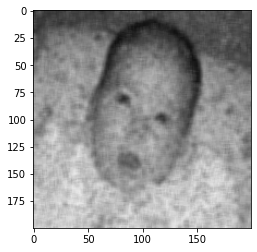

In [ ]:
#apply average filter on salt pepper noise should degrade the image further 

noise_removed_img_average_filter = cv2.blur(resizedImg, (5,5))

plt.imshow(noise_removed_img_average_filter)

new_result_average_filter = model.predict(np.array([noise_removed_img_average_filter]))
print(new_result_average_filter)

getClass(new_result_average_filter.argmax(axis=1)[0])

In [ ]:
#todo- try morphological filtering, low pass filters to check the results and see which technique is more efficient on which type of noise

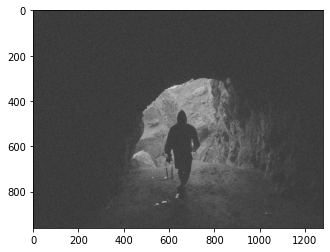

In [ ]:
#take another image -> contaminated with gausssian noise

newNoisyImg = cv2.imread("/content/test_im/gaussian/DatabaseImage0009gauimgNoise20.jpg")
plt.imshow(newNoisyImg,cmap="gray")

In [ ]:
newNoisyImg.shape

(960, 1280, 3)

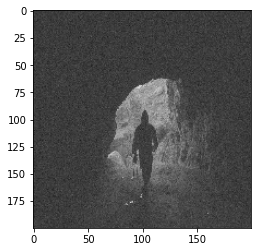

In [ ]:
newNoisyImgResized =  cv2.cvtColor(np.array(newNoisyImg), cv2.COLOR_RGB2BGR)
resizedImage = cv2.resize(newNoisyImgResized,(200,200))
plt.imshow(resizedImage,cmap="gray")

In [ ]:
resizedImage.shape

(200, 200, 3)

In [ ]:
#current image noise level

result_2 = model.predict(np.array([resizedImage]))

print(result_2)

getClass(result_2.argmax(axis=1)[0])

1/1 [==============================] - 0s 21ms/step
[[0.02380531 0.00985514 0.5243732  0.00385105 0.042596   0.07955436
  0.00136101 0.00502843 0.3095755 ]]


'gaussian'

In [ ]:
gen.class_indices

{'erlang': 0,
 'exponential': 1,
 'gaussian': 2,
 'lognormal': 3,
 'poisson': 4,
 'rayleigh': 5,
 'saltpepper': 6,
 'speckle': 7,
 'uniform': 8}

In [ ]:
# low pass gaussian filter on the image
filteredImgNew = cv2.GaussianBlur(resizedImage,(5, 5), 5)

In [ ]:
result_2_updated = model.predict(np.array([filteredImgNew]))

print(result_2_updated)

getClass(result_2_updated.argmax(axis=1)[0])

1/1 [==============================] - 0s 21ms/step
[[0.26372892 0.01873057 0.11487857 0.00401327 0.27188212 0.28399378
  0.00212417 0.00092218 0.03972648]]


'rayleigh'

In [ ]:
from scipy.signal import convolve2d
from skimage.util import img_as_float
from skimage import color, data, restoration
from scipy.signal import wiener

(200, 200, 3)
1/1 [==============================] - 0s 21ms/step
[[0.08078039 0.12136124 0.08664407 0.14847295 0.13856205 0.10906538
  0.08180601 0.11391997 0.11938789]]


'lognormal'

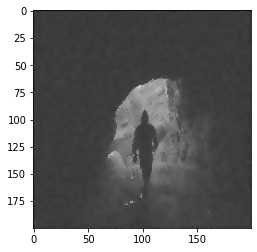

In [ ]:
# apply weiner filter on gaussiann noise

img5 = color.rgb2gray(resizedImage)
weiner_filtered = wiener(img5, (5, 5))
rgb_stacked_img = cv2.merge([weiner_filtered,weiner_filtered,weiner_filtered])
# dim = np.zeros((200,200))
# rgb_stacked_img = np.stack((weiner_filtered,dim, dim), axis=2)

print(rgb_stacked_img.shape)
plt.imshow(rgb_stacked_img,cmap="gray")


result_updated_weiner = model.predict(np.array([rgb_stacked_img]))

print(result_updated_weiner)

getClass(result_updated_weiner.argmax(axis=1)[0])

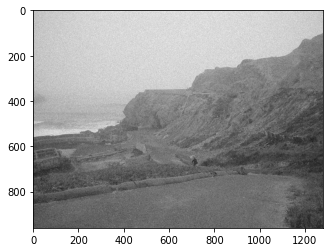

In [ ]:
# average filter on uniform noise image

avg_noise = cv2.imread("/content/test_im/uniform/DatabaseImage0007unimgNoise100.jpg")
plt.imshow(avg_noise,cmap="gray")

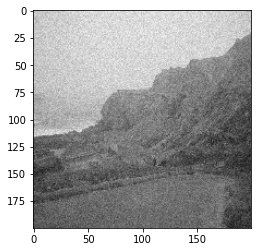

In [ ]:
avgNoisyImgResized =  cv2.cvtColor(np.array(avg_noise), cv2.COLOR_RGB2BGR)
resizedImageAvg = cv2.resize(avgNoisyImgResized,(200,200))
plt.imshow(resizedImageAvg,cmap="gray")

In [ ]:
#current image noise level

result_3 = model.predict(np.array([resizedImageAvg]))

print(result_3)

getClass(result_3.argmax(axis=1)[0])

1/1 [==============================] - 0s 27ms/step
[[2.7916454e-05 2.5215411e-05 3.8773912e-01 3.5033112e-09 2.4632341e-04
  3.7845236e-04 6.5547579e-06 7.6763179e-05 6.1149967e-01]]


'uniform'

In [ ]:
gen.class_indices

{'erlang': 0,
 'exponential': 1,
 'gaussian': 2,
 'lognormal': 3,
 'poisson': 4,
 'rayleigh': 5,
 'saltpepper': 6,
 'speckle': 7,
 'uniform': 8}

In [ ]:
# average filter on the image
filteredImgAvg = cv2.blur(resizedImage,(5, 5))


result_3_updated = model.predict(np.array([filteredImgAvg]))

print(result_3_updated)

getClass(result_3_updated.argmax(axis=1)[0])

1/1 [==============================] - 0s 24ms/step
[[2.5679842e-01 1.9630030e-02 4.0433962e-02 2.7960653e-03 3.0117410e-01
  3.7678698e-01 3.6277962e-04 1.0241999e-03 9.9342817e-04]]


'rayleigh'

In [ ]:
#######Results -> 

# Average filter works best for image contaminated with uniform noise
# Median filter works best for image contaminated with salt & pepper noise
# Gaussain filter works best for image contaminated with Gaussian noise
# Wiener filter outperformed for gaussian noisy image then gaussian average filter